<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Generative AI for Business Applications</center></font>
<center><font size=6>Week 2: AI Foundations - DL</center></font>

<center><p float="center">
  <img src="https://images.pexels.com/photos/6994265/pexels-photo-6994265.jpeg" width=720></a>
<center><font size=6>Credit Card Fraud Detection</center></font>

## Problem Statement

### Business Context

In the rapidly evolving digital financial landscape, the ability to detect fraudulent credit card transactions has become vital for minimizing financial losses and maintaining customer trust. With the significant increase in digital payment volumes, traditional rule-based detection systems often struggle to keep pace with increasingly sophisticated and adaptive fraud techniques employed by malicious actors. This inadequacy leads to the potential for substantial economic damage to financial institutions and a degradation of customer confidence.

To address this pressing issue, financial institutions are increasingly turning to deep learning models that can analyze a variety of transaction features, including distance from the customer’s home, spending patterns, and device usage behaviors. By leveraging these models, banks and financial service providers can facilitate real-time fraud detection, enhance their risk management strategies, and build a more resilient security framework. This proactive approach allows institutions to respond swiftly to potential fraud, effectively shielding both their assets and their customers from financial harm.

### Objective

The challenge at hand is to develop an effective deep learning model capable of accurately detecting fraudulent transactions amidst the complexities of transactional data. The objective is to create a system that can classify transactions as either genuine or fraudulent by utilizing various behavioral and transactional features to inform its predictions.

The end goal of the project is to fortify the bank's defenses against fraud, fostering a secure and trustworthy environment for customers while preserving the institution's long-term viability and reputation in the competitive financial landscape.

### Data Description

This dataset contains transaction details for fraud detection, with the following columns:

- **distance_from_home**: Distance between transaction location and the customer’s home.
- **distance_from_last_transaction**: Distance from the customer’s last transaction.
- **ratio_to_median_purchase_price**: Ratio of the current transaction to the customer's median purchase price.
- **repeat_retailer**: Indicates if the retailer is one the customer has visited before.
- **used_chip**: Flag indicating whether the card chip was used.
- **used_pin_number**: Flag indicating whether a PIN was used.
- **online_order**: Flag indicating if the transaction was made online.
- **fraud**: Target variable; indicates if the transaction was fraudulent (1) or not (0).

This dataset will help build a model to detect potentially fraudulent transactions.

## Importing Necessary Libraries

Before diving into data exploration and building fraud detection models, we first import the essential Python libraries that will guide us through each stage of this machine learning pipeline. These tools form the backbone of our analysis—from data cleaning to model evaluation.

Here’s what we’ll be using:

- **NumPy** and **Pandas** for efficient numerical operations and structured data manipulation.
- **Matplotlib** and **Seaborn** for creating clear, insightful visualizations that help us identify patterns.
- **Scikit-learn** for data splitting, preprocessing, and scaling, including tools for train-test splitting and scaling features.
- **TensorFlow** and **Keras** for building deep learning models, specifically for fraud prediction.


With these tools in hand, we are ready to begin our data-driven journey to uncover **fraudulent transactions** and predict them effectively.

**Prompt**:

<font size=4 color="#4682B4"><b>I want to analyze the provided CSV data and build a neural network model to detect fradulent transactions based on provided attributes.
Help me import the necessary Python libraries to
1.   Analyze the data
2.   Visualize patterns in the data
3.   Preprocess the data
4.   Build a Artificial Neural Network model.
5.   Evaluate the model's performance

In [1]:
# Import NumPy for numerical operations.
import numpy as np

# Import Pandas for data manipulation and analysis.
import pandas as pd

# Import Matplotlib for data visualization.
import matplotlib.pyplot as plt

# Import Seaborn for enhanced data visualization.
import seaborn as sns

# Import train_test_split for splitting data into training and testing sets.
from sklearn.model_selection import train_test_split

# Import MinMaxScaler for feature scaling.
from sklearn.preprocessing import MinMaxScaler

# Import TensorFlow and Keras for deep learning model building.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
# Other potential imports based on typical DL workflows:
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


**Prompt**:

<font size=3 color="#4682B4"><b>Neural network results are often difficult to reproduce due to randomness. Set a random seed based on the libraries already imported to ensure consistent model results across multiple runs.
</font>

In [2]:
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(42)


Setting a random seed ensures that random processes like weight initialization and data shuffling give the same results every time, helping with consistent comparisons.


## Loading the Data

Now that we have our libraries ready, the next step is to load the data we’ll be working with. This dataset contains information about customers—like their age, income, how long they’ve been with the bank, how often they use their credit card, and whether they stayed or left the bank.

We’ll use the Pandas library to load the data. Pandas makes it easy to work with tables of data and take a quick look at what’s inside.

Here, the fraud_dataset data is available in a CSV format We can load the data into a pandas dataframe.

Let’s load the dataset and see what it looks like.

***Prompt***:

<font size=3 color="#4682B4"><b> Load the fraud_dataset.csv file and store it as data.
</font>

In [3]:
data = pd.read_csv('../data/fraud_dataset.csv')


- The CSV file can also be directly loaded from Google Drive.

***Prompt***:

<font size=3 color="#4682B4"><b> Load the fraud_dataset.csv file from Google Drive and store it as data.
</font>

* We load our dataset from Google Drive.
* The file named **`fraud_dataset`** has been stored there.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/fraud_dataset.csv')


## Data Overview

Now that the dataset is loaded, the next step is to understand what the data looks like. Before we move on to building models, it’s important to take a closer look at the structure and contents of the dataset.

In this step, we will:

- Check how many rows and columns the dataset has  
- Look at the first few rows to get a feel for the data  
- See what data types each column has  
- Check for any missing or unusual values  

This basic overview will help us decide what kind of cleaning or preparation the data might need. Let’s explore the dataset and understand what we’re working with.

***Prompt***:

<font size=3 color="#4682B4"><b> Display the number of rows and columns in the data.
</font>

In [4]:
data.shape


(152740, 8)

The data consists of 152740 rows and 8 columns

***Prompt***:

<font size=3 color="#4682B4"><b> Display the first 10 rows of the data.
</font>

In [5]:
print(data.head(10))


   distance_from_home  distance_from_last_transaction  \
0            4.597583                        0.084182   
1            2.847323                        2.212334   
2            4.248422                        5.191844   
3            8.495267                        0.194119   
4           38.473389                        0.746505   
5           15.632878                       12.065805   
6           36.471617                        0.416918   
7           26.390598                        0.618949   
8           30.623331                       37.642254   
9           37.701224                        8.210105   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        0.964720                1          0   
1                        0.203593                1          0   
2                        0.247123                1          1   
3                        0.361700                1          1   
4                        3.119982              

**Note:** If the generated code is not displaying the data in a tabular format. To ensure it appears as a table, simply remove the `print` statement from commands like `print(df.head(10))` to  `df.head(10)`.

In [6]:
data.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,4.597583,0.084182,0.964720,1,0,0,0,0
1,2.847323,2.212334,0.203593,1,0,0,1,0
2,4.248422,5.191844,0.247123,1,1,1,1,0
3,8.495267,0.194119,0.361700,1,1,0,1,0
4,38.473389,0.746505,3.119982,1,0,0,1,0
5,15.632878,12.065805,2.327001,1,0,0,1,0
6,36.471617,0.416918,0.370543,1,0,0,1,0
7,26.390598,0.618949,0.943148,1,0,0,1,0
8,30.623331,37.642254,0.922867,1,0,0,0,0
9,37.701224,8.210105,0.698312,1,0,0,1,0


***Prompt***:

<font size=3 color="#4682B4"><b> Display the last 10 rows of the data.
</font>

In [7]:
data.tail(10)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
152730,13.793593,1.376635,0.149236,1,0,0,1,0
152731,31.695666,8.489614,0.686936,1,1,0,0,0
152732,4.387251,0.153863,0.842752,1,1,0,1,0
152733,12.304705,0.723287,1.064707,1,0,0,0,0
152734,41.438062,0.154841,1.312763,1,0,0,1,0
152735,6.315519,1.925504,2.407671,1,0,0,0,0
152736,8.981446,5.338373,0.269774,1,1,0,1,0
152737,6.051465,0.034045,0.275358,1,1,0,1,0
152738,12.158849,4.682585,4.491612,1,0,0,1,1
152739,28.347824,5.517715,0.713750,1,0,0,1,0


***Prompt***:

<font size=3 color="#4682B4"><b> Display the names, data types, and number of rows in the columns of the data.
</font>

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152740 entries, 0 to 152739
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              152740 non-null  float64
 1   distance_from_last_transaction  152740 non-null  float64
 2   ratio_to_median_purchase_price  152740 non-null  float64
 3   repeat_retailer                 152740 non-null  int64  
 4   used_chip                       152740 non-null  int64  
 5   used_pin_number                 152740 non-null  int64  
 6   online_order                    152740 non-null  int64  
 7   fraud                           152740 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 9.3 MB


The data contains 152,740 records with 8 features and no missing values.

We conclude there are no missing rows in the DataFrame as all columns have 152,740 non-null entries, matching the total number of records.


***Prompt***:

<font size=3 color="#4682B4"><b>Display the statistical summary of the data
</font>

In [9]:
data.describe()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,152740.000000,152740.000000,152740.000000,152740.000000,152740.000000,152740.000000,152740.000000,152740.000000
mean,25.466747,4.743427,1.696707,0.881917,0.353830,0.105002,0.642373,0.057221
std,64.714307,24.151898,2.562895,0.322707,0.478159,0.306557,0.479303,0.232266
min,0.024602,0.000118,0.006125,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.859140,0.293324,0.467232,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.852958,0.989281,0.971711,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.304466,3.310223,1.985643,1.000000,1.000000,0.000000,1.000000,0.000000
max,8777.136420,4968.315477,91.847397,1.000000,1.000000,1.000000,1.000000,1.000000


Note: To make the visualization easier to interpret, we can also transpose the data by appending `.T` at the end.

In [10]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
distance_from_home,152740.0,25.466747,64.714307,0.024602,3.859140,9.852958,25.304466,8777.136420
distance_from_last_transaction,152740.0,4.743427,24.151898,0.000118,0.293324,0.989281,3.310223,4968.315477
ratio_to_median_purchase_price,152740.0,1.696707,2.562895,0.006125,0.467232,0.971711,1.985643,91.847397
repeat_retailer,152740.0,0.881917,0.322707,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,152740.0,0.353830,0.478159,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,152740.0,0.105002,0.306557,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,152740.0,0.642373,0.479303,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,152740.0,0.057221,0.232266,0.000000,0.000000,0.000000,0.000000,1.000000


* **distance\_from\_home**: Mean = 25.47, Std = 64.71, ranging from 0.02 to 8777.14, indicating wide variation in how far customers are from home when making purchases.
* **distance\_from\_last\_transaction**: Mean = 4.74, Std = 24.15, ranging from 0.0001 to 4968.32, suggesting diverse distances between consecutive transactions.
* **ratio\_to\_median\_purchase\_price**: Mean = 1.70, Std = 2.56, with a range from 0.006 to 91.85, indicating that most purchases are close to the median price, though some outliers exist.

The last five columns (**repeat\_retailer**, **used\_chip**, **used\_pin\_number**, **online\_order**, and **fraud**) are binary categorical variables (0 or 1), representing transaction characteristics such as repeat retailer usage, chip usage, PIN entry, online purchase, and whether the transaction was fraudulent.


***Prompt***:

<font size=3 color="#4682B4"><b> Display how many duplicate rows are present in the data
</font>

In [11]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")


Number of duplicate rows: 0


There are no duplicate records in the data. If any were present, they could be removed using `data.drop_duplicates()`.

## Exploratory Data Analysis

Now that we understand the structure of our dataset, it’s time to take a closer look at the details through **Exploratory Data Analysis (EDA)**. This step helps us discover patterns and gain insights into how different features behave—especially in the context of identifying fraudulent transactions.

In this section, we will:

* Examine how **numerical features** like `distance_from_home`, `distance_from_last_transaction`, and `ratio_to_median_purchase_price` are distributed
* Check the distribution of **categorical features** such as `repeat_retailer`, `used_chip`, `used_pin_number`, `online_order`, and `fraud`
* Explore how these features might be related to the **likelihood of fraud**

Conducting EDA helps us understand the data more deeply and prepares us to build a model that can more accurately detect fraudulent activity.

Let’s start exploring.


We manually categorize the columns into numerical and categorical types by inspecting the data, as some columns contain numeric values but represent categories—making it difficult to accurately separate them using prompting methods.

In [13]:
cat_columns = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
num_columns = ['distance_from_home', 'distance_from_last_transaction','ratio_to_median_purchase_price' ]


### Univariate Analysis

#### Categorical Column

***Prompt***:

<font size=3 color="#4682B4"><b>Visualize the distribution of the categorical features listed in cat_columns.
</font>

The code loops through categorical columns, creates bar charts for each column.

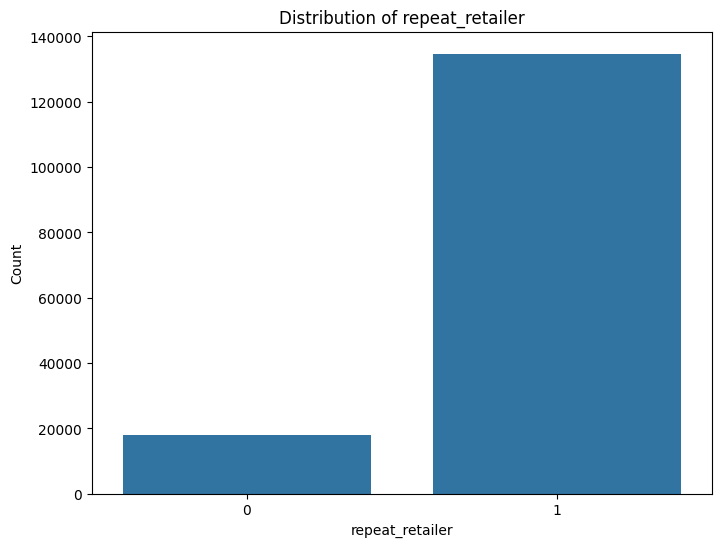

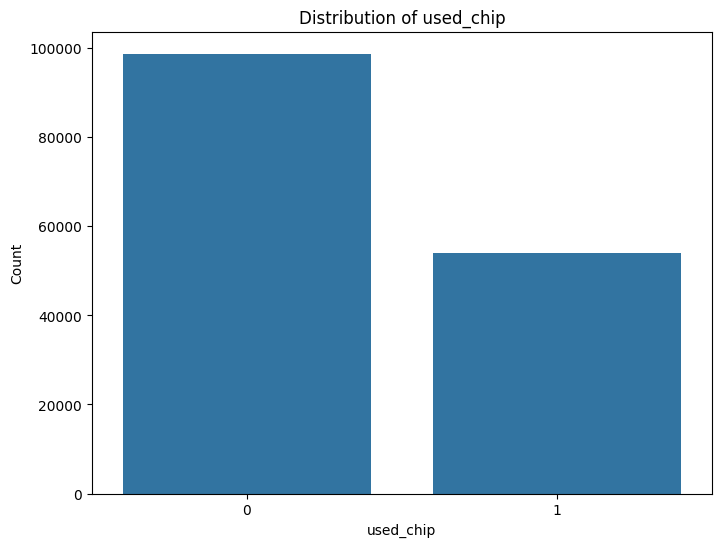

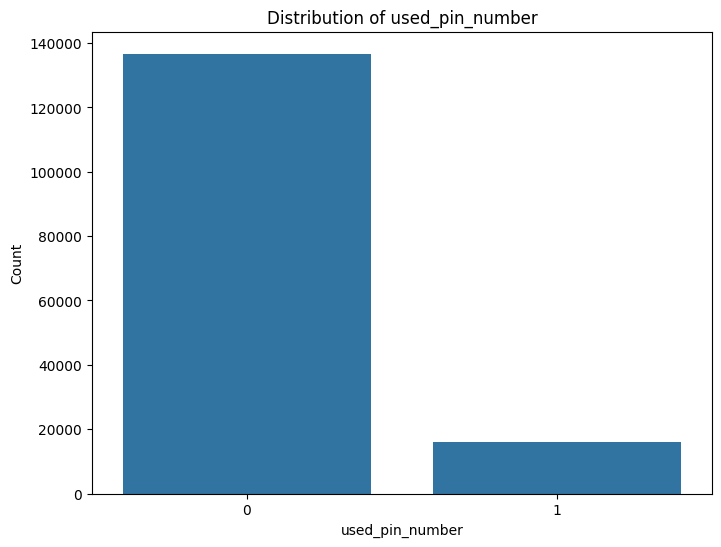

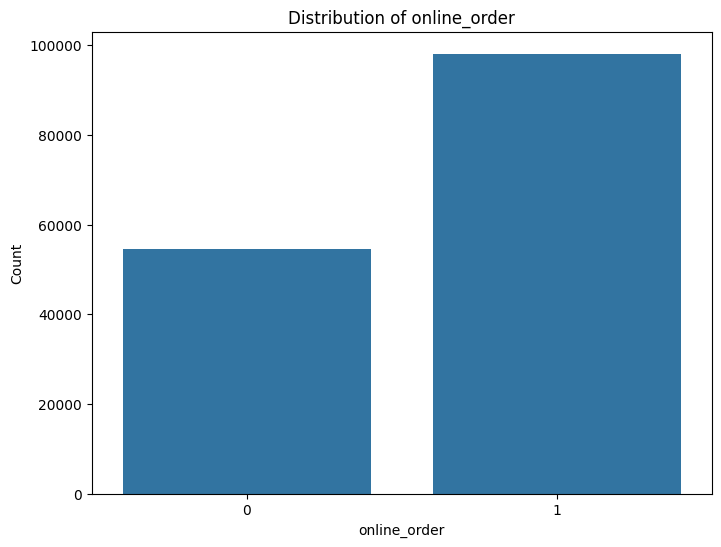

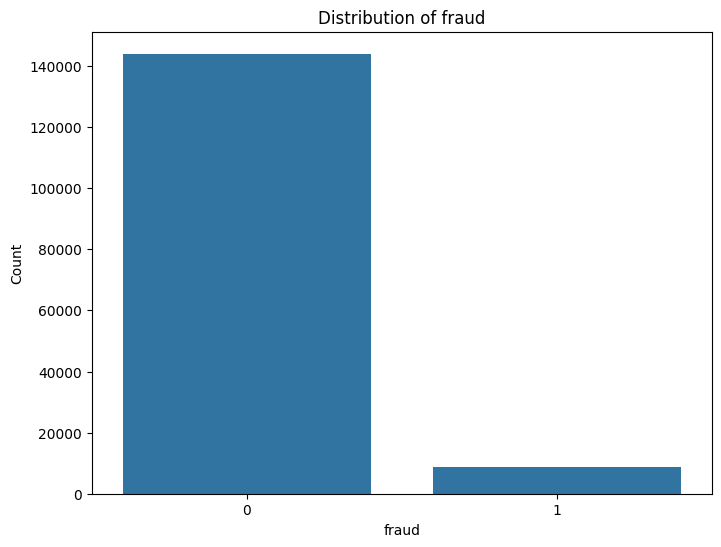

In [14]:
for col in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


To understand the purpose of each line, we update the prompt to include **"Explain the code."**


***Prompt***:

<font size=3 color="#4682B4"><b> Visualize the distribution of the categorical features listed in cat_columns and explain the code
</font>

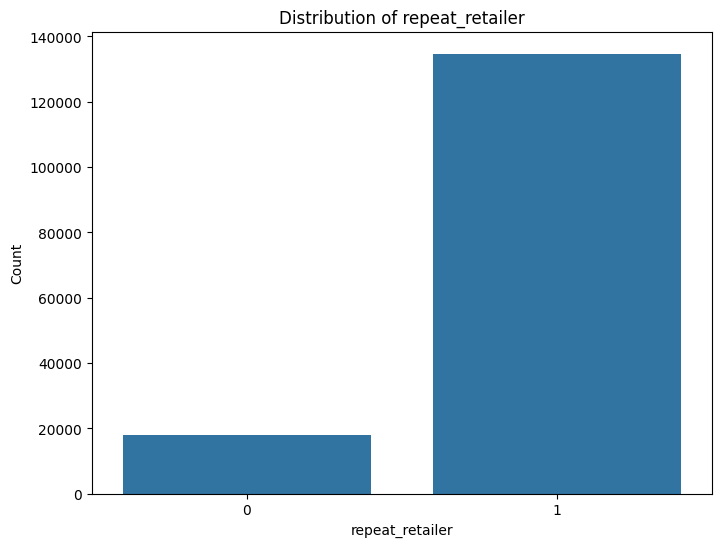

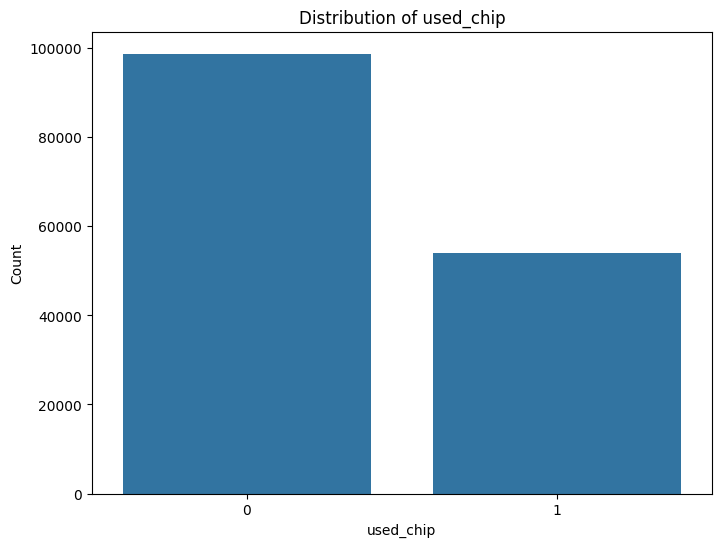

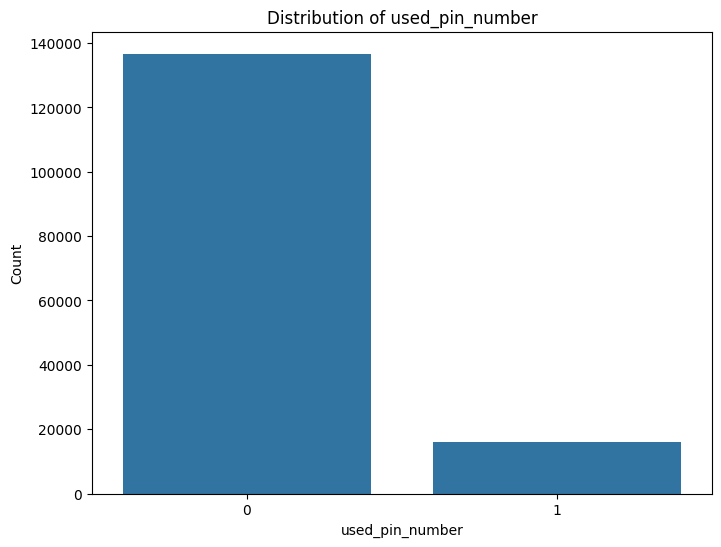

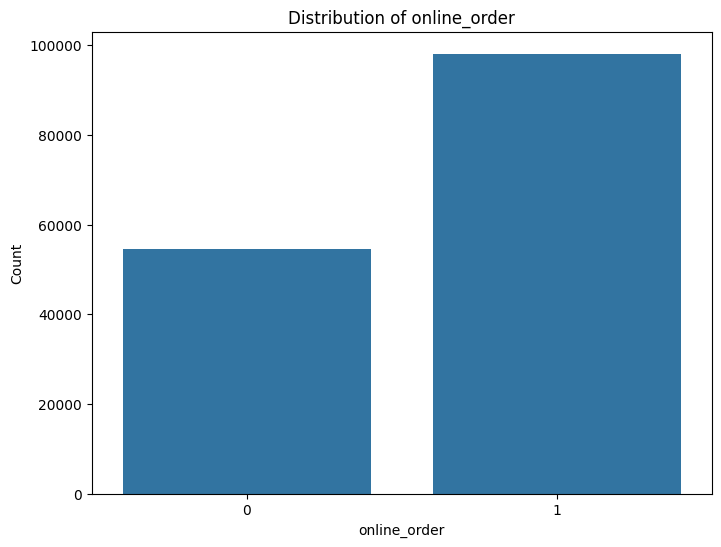

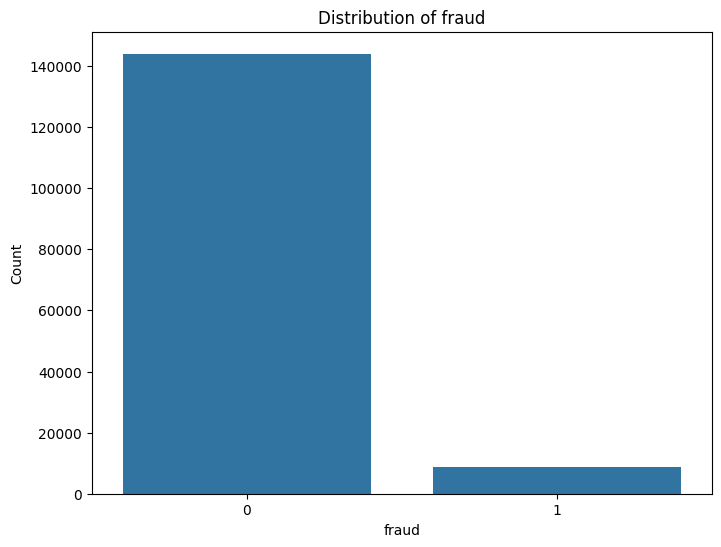

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each categorical column
for col in cat_columns:
    plt.figure(figsize=(8, 6))  # Set figure size for better visualization
    sns.countplot(x=col, data=data)  # Create countplot for the current column
    plt.title(f'Distribution of {col}')  # Set title of the plot
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Count')  # Set y-axis label
    plt.show()  # Display the plot



**Observations**

1. **Repeat Retailer**:
   A significant majority of customers have made purchases from repeat retailers, suggesting strong customer loyalty or preference for specific stores.

2. **Used Chip**:
   Most customers did not use chip-enabled cards, which could be influenced by factors such as card type or customer behavior, indicating that chip usage is less common among this group.

3. **Used Pin Number**:
   The majority of customers did not use a PIN number for transactions, which may suggest a preference for simpler payment methods, such as contactless or card-present transactions.

4. **Online Order**:
   A large number of customers made online orders, reflecting a significant preference for online shopping, which is in line with broader consumer behavior trends.

5. **Fraud**:
   A considerable portion of the transactions are flagged as fraudulent, which highlights the importance of detecting fraudulent activity within the dataset, especially for predictive modeling purposes.

#### Numerical Columns


***Prompt***:

<font size=3 color="#4682B4"><b> Visualize the distribution of the numerical features listed in num_columns.

</font>

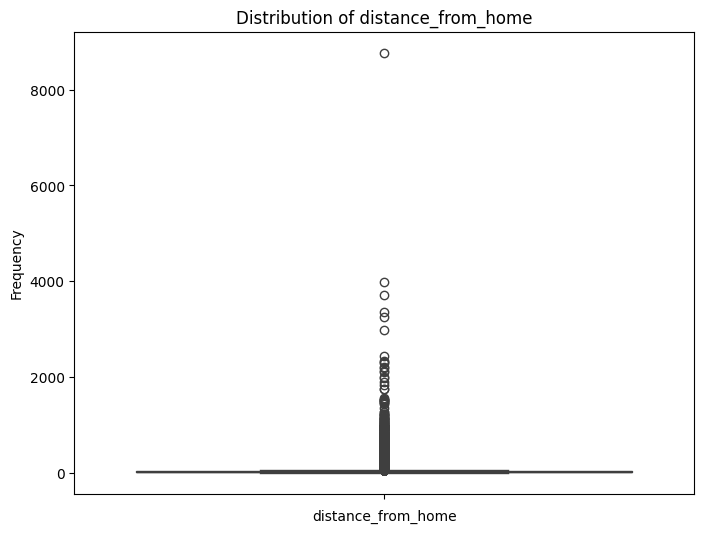

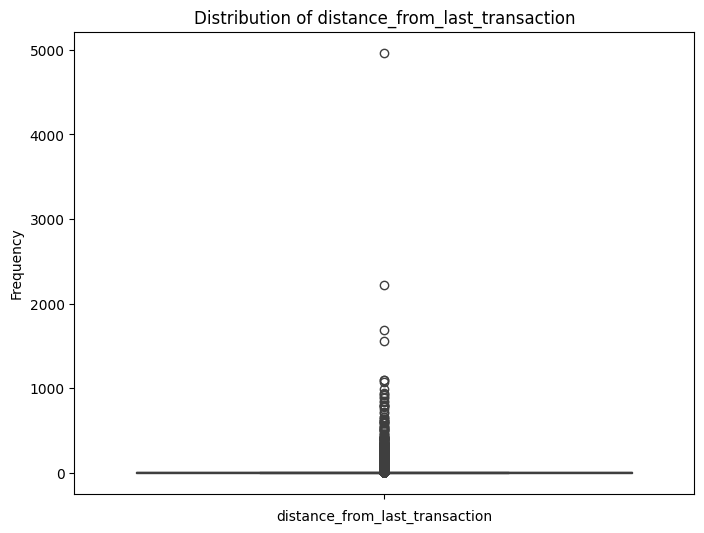

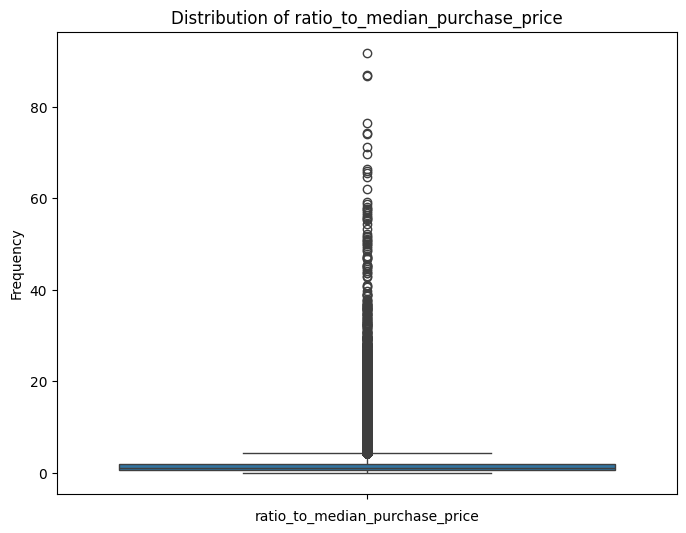

In [16]:
for col in num_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


From these charts, we can see that there are many outliers, and some distances are excessively far from the median. This indicates potential irregularities in transaction behavior that may warrant further investigation for fraud.

### Bivariate Analysis

***Prompt***:

<font size=3 color="#4682B4"><b> Visualize the distribution of distance_from_last_transaction for fraudulent and non-fraudulent transactions.
</font>

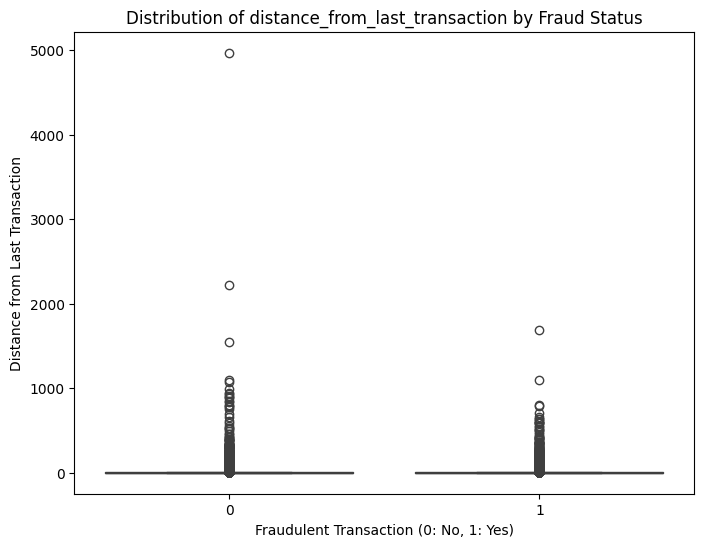

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fraud', y='distance_from_last_transaction', data=data)
plt.title('Distribution of distance_from_last_transaction by Fraud Status')
plt.xlabel('Fraudulent Transaction (0: No, 1: Yes)')
plt.ylabel('Distance from Last Transaction')
plt.show()


**Observations**

Both fraudulent and non-fraudulent transactions mostly have low "distance from last transaction," with similar patterns and notable outliers, especially in non-fraudulent ones. This feature may not strongly differentiate between the two.

***Prompt***:

<font size=3 color="#4682B4"><b> Visualize the distribution of ratio_to_median_purchase_price for fraudulent and non-fraudulent transactions.
</font>

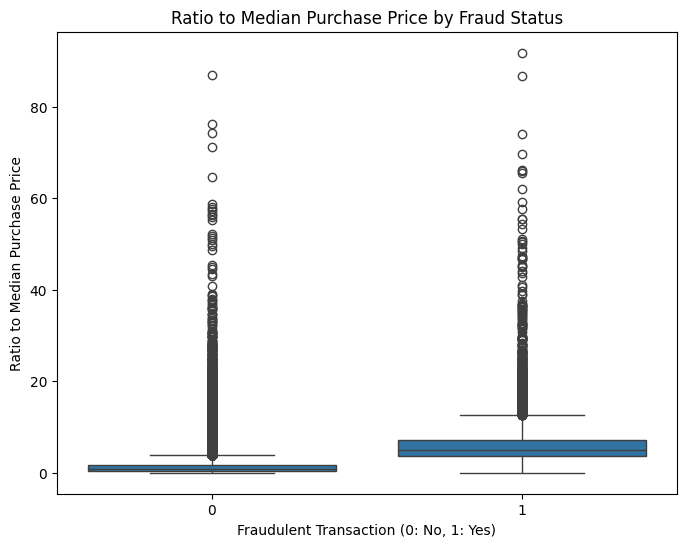

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fraud', y='ratio_to_median_purchase_price', data=data)
plt.title('Ratio to Median Purchase Price by Fraud Status')
plt.xlabel('Fraudulent Transaction (0: No, 1: Yes)')
plt.ylabel('Ratio to Median Purchase Price')
plt.show()


**Observations**

In fraudulent transactions, the interquartile range (IQR) is slightly larger, suggesting more variability in the "ratio to median purchase price" compared to non-fraudulent transactions. However, both categories still show significant overlap.

***Prompt***:

<font size=3 color="#4682B4"><b>  Visualize the distribution of fraudulent transactions across chip used using a bar chart. Focus only on the fraud cases.




</font>

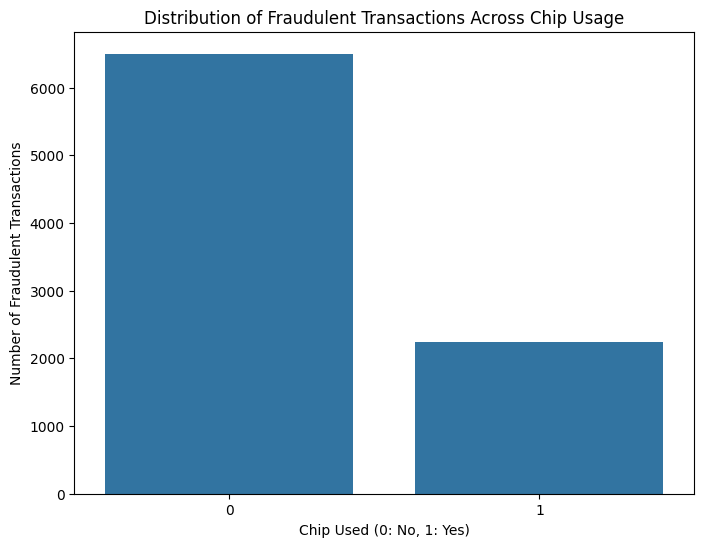

In [19]:
# Filter the DataFrame to include only fraudulent transactions
fraud_transactions = data[data['fraud'] == 1]

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='used_chip', data=fraud_transactions)
plt.title('Distribution of Fraudulent Transactions Across Chip Usage')
plt.xlabel('Chip Used (0: No, 1: Yes)')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


**Observation**

In the case of fraudulent transactions, approximately 75% occurred without the use of a chip, while only about 25% involved chip usage. This indicates that fraud is significantly more prevalent in transactions where chip technology is not utilized, possibly due to the enhanced security that chip-based transactions provide. The lower fraud rate in chip-enabled transactions highlights the effectiveness of chip-and-pin systems in reducing unauthorized activity.

***Prompt***:

<font size=3 color="#4682B4"><b>Visualize the distribution of fraudulent transactions across pin usage using a bar chart. Focus only on the fraud cases.


</font>

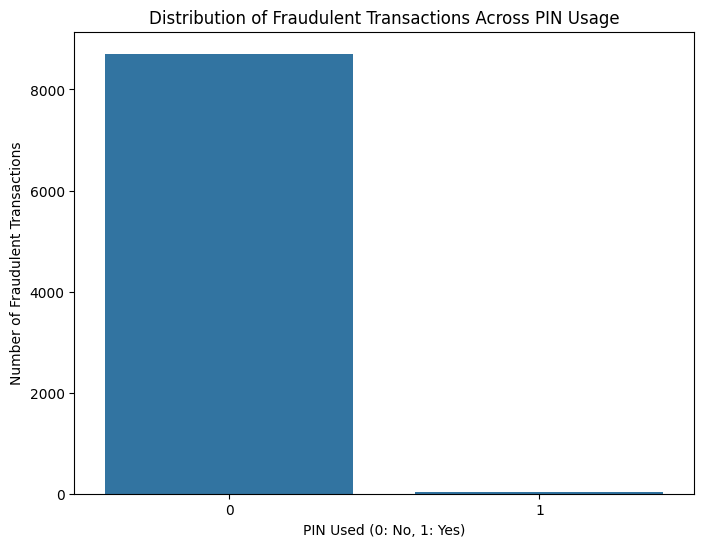

In [20]:
# Filter the DataFrame to include only fraudulent transactions
fraud_transactions = data[data['fraud'] == 1]

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='used_pin_number', data=fraud_transactions)
plt.title('Distribution of Fraudulent Transactions Across PIN Usage')
plt.xlabel('PIN Used (0: No, 1: Yes)')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


**Observation**

Within the fraudulent transactions, the majority did not involve the use of a PIN number, indicating that most fraud cases occurred where PIN verification was not required. Only a small fraction of fraud cases had PIN usage. This suggests that transactions without PIN authentication are more vulnerable to fraud, likely because they have fewer security checks, making it easier for unauthorized users to complete purchases.

***Prompt***:

<font size=3 color="#4682B4"><b> Visualize the distribution of fraudulent transactions across Order type using a bar chart. Focus only on the fraud cases.

</font>

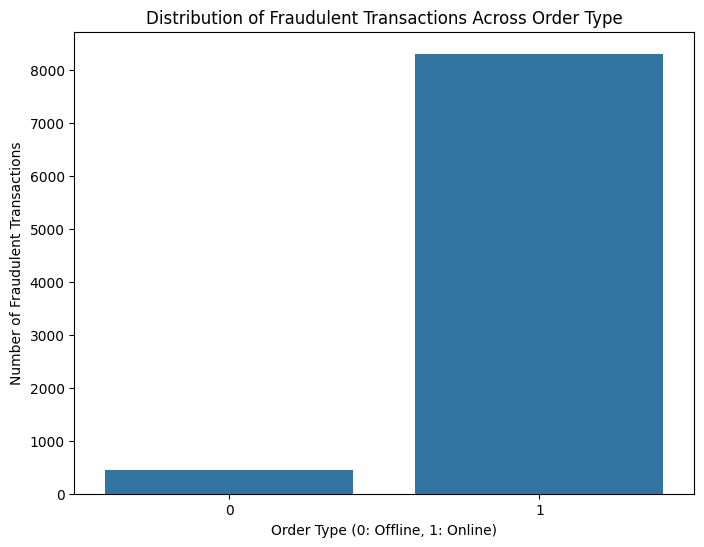

In [21]:
# Filter the DataFrame to include only fraudulent transactions
fraud_transactions = data[data['fraud'] == 1]

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', data=fraud_transactions)
plt.title('Distribution of Fraudulent Transactions Across Order Type')
plt.xlabel('Order Type (0: Offline, 1: Online)')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


**Observation**

Among the fraudulent transactions, the majority were online orders, with only a small portion being offline transactions. This suggests that online transactions are more susceptible to fraud, likely due to the lack of physical verification and the increased opportunity for anonymity. The digital nature of online purchases may provide fraudsters with easier access and fewer barriers compared to in-person transactions.

## Data Preprocessing

Before we can train our deep learning model, we need to prepare the data properly.

Since all the features in our dataset are already in numerical format, we don't need to perform any encoding.

In this step, we will:
1. **Split the data** into training, validation, and test sets using a 70:15:15 ratio. This helps us train the model, tune it, and finally evaluate its performance on unseen data.
2. **Scale the features** using **MinMaxScaler** to bring all values into a similar range, which helps the model learn more effectively.

With this setup, we’re ready to move forward to model building.

**Why Split the Data into Train, Validation, and Test?**  
- **Train Set**: Used to fit the model and learn patterns.  
- **Validation Set**: Helps tune model parameters and prevent overfitting.  
- **Test Set**: Used only at the end to evaluate model performance on unseen data.  

This 3-way split ensures the model generalizes well and provides an unbiased estimate of its effectiveness.

***Prompt***:

<font size=3 color="#4682B4"><b>Perform the following data preprocessing steps:
1. Split the data into training, validation, and test sets in a 70:15:15 ratio
2. Ensure the class distribution is maintained across the sets
3. Normalize the features
</font>

In [22]:
# Split data into training, validation, and test sets (70:15:15)
X = data.drop('fraud', axis=1)
y = data['fraud']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


***Prompt***:

<font size=3 color="#4682B4"><b>  Show the shape of all split data.
</font>

In [23]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


X_train shape: (106918, 7)
X_val shape: (22911, 7)
X_test shape: (22911, 7)
y_train shape: (106918,)
y_val shape: (22911,)
y_test shape: (22911,)


## Model Building

With the data prepared, we now move to building and training Artificial Neural Networks (ANNs) to predict fraud. We'll experiment with different ANN architectures to find the most effective setup.

What We’ll Do:
1. **Define the ANN model** – Try out various architectures.
2. **Train the model** – Use training data to learn patterns.
3. **Validate and test** – Evaluate the model on unseen data.



### Model Evaluation Criterion

In fraud detection, the model can make wrong predictions as:  
- Predicting a transaction is fraudulent when it's not (False Positive)  
- Predicting a transaction is not fraudulent when it actually is (False Negative)

**Which case is more important?**  
Predicting that a transaction is not fraudulent when it actually is — i.e., **missing a fraud case** — is more critical, as it can lead to financial losses and security risks.

**How to reduce this loss?**  
To minimize missed fraud cases (False Negatives), the company needs to **maximize Recall**. A higher Recall increases the chances of correctly identifying fraudulent transactions (True Positives). Therefore, the focus should be on increasing Recall to ensure that most fraud cases are caught, even if it leads to a few false alarms, thereby protecting the company from potential financial risks.

First, we create a blank DataFrame to store the training and testing metrics of different models.

***Prompt***:

<font size=3 color="#4682B4"><b>Create a blank DataFrame to store the training and testing evaluation results of different models.
</font>

In [24]:
# prompt: Create a blank DataFrame to store the training and validation evaluation results of different models.

evaluation_results = pd.DataFrame(columns=['Model', 'Train_Loss', 'Train_Accuracy', 'Train_Precision', 'Train_Recall', 'Train_F1',
                                         'Val_Loss', 'Val_Accuracy', 'Val_Precision', 'Val_Recall', 'Val_F1'])


### Model 1

We build our first neural network model using a simple architecture with three layers:

- **Input Layer**  
- **One Hidden Layer**  
- **Output Layer** with a **sigmoid activation** to handle binary classification.

We use **Binary Crossentropy** as the loss function and **Stochastic Gradient Descent (SGD)** as the optimizer.

***Prompt***:

<font size=3 color="#4682B4"><b>  Reset any previously stored Keras model state and release system memory.
</font>

In [25]:
import gc

# Clear Keras session
tf.keras.backend.clear_session()

# Garbage collect
gc.collect()


13235

***Prompt***:

<font size=3 color="#4682B4"><b> Create first neural network model for binary classification with the following architecture:
- An input layer
- A hidden layer with 64 neurons and ReLU activation
- An output layer

Use a relevant loss function, stochastic gradient descent (SGD) as the optimizer, and recall as the metric to optimize for.
Show the final model architecture with number of parameters and other details.
</font>

In [26]:
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(optimizer="SGD",loss='binary_crossentropy',metrics=[tf.keras.metrics.Recall()])

# Show the model summary
model1.summary()

/opt/anaconda3/envs/fixed_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577 (2.25 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

You can specify the loss function using its name as a string. For example:

```python
model1.compile(optimizer="SGD", loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])
```

Alternatively, you can use the built-in loss function class for more flexibility or customization, like this:

```python
from tensorflow.keras.losses import BinaryCrossentropy
model1.compile(optimizer="SGD", loss=BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall()])
```

This approach is helpful when you want to set additional parameters or use the loss function more explicitly.

You can also define the input layer separately using the `Input` layer. Instead of passing the input shape directly in the first `Dense` layer, use:

```python
model1 = Sequential()
model1.add(Input(shape=(X_train.shape[1],)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
```

This allows for more explicit control in model design.


***Prompt***:

<font size=3 color="#4682B4"><b> Fit the model on the training data for 25 epochs with a batch size equal to the size of the entire dataset, and record the training time.
</font>

In [27]:
import time

start_time = time.time()

history1 = model1.fit(X_train, y_train, epochs=25, batch_size=X_train.shape[0])

end_time = time.time()
training_time = end_time - start_time

print(f"Training time: {training_time:.2f} seconds")

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - loss: 0.5789 - recall: 3.2690e-04
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5726 - recall: 1.6345e-04
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5664 - recall: 1.6345e-04
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.5603 - recall: 1.6345e-04
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5544 - recall: 1.6345e-04
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.5486 - recall: 1.6345e-04
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.5429 - recall: 1.6345e-04
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.5373 - recall: 0.0000e+00
Epoch 9/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5319 - recall: 0.0000e+00
Epoch 10/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.5266 - recall: 0.0000e+00
Epoch 11/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.5213 - recall: 0.0000e+00
Epoch 12/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.51

***Prompt***:

<font size=3 color="#4682B4"><b>Evaluate the performance of the model on the training and validation data, store it in evaluation_results and  display the report.
</font>

In [28]:
y_train_pred_proba = model1.predict(X_train)
y_train_pred = (y_train_pred_proba > 0.5).astype(int)

train_report = classification_report(y_train, y_train_pred, output_dict=True)

# Store results in model_eval
model_eval = {}
model_eval['Model'] = 'Model 1'
model_eval['Train_Loss'] = model1.evaluate(X_train, y_train, verbose=0)[0]
model_eval['Train_Accuracy'] = train_report['accuracy']
model_eval['Train_Precision'] = train_report['1']['precision']
model_eval['Train_Recall'] = train_report['1']['recall']
model_eval['Train_F1'] = train_report['1']['f1-score']

# Evaluate on validation data
y_val_pred_proba = model1.predict(X_val)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

val_report = classification_report(y_val, y_val_pred, output_dict=True)

# Store validation results in model_eval
model_eval['Val_Loss'] = model1.evaluate(X_val, y_val, verbose=0)[0]
model_eval['Val_Accuracy'] = val_report['accuracy']
model_eval['Val_Precision'] = val_report['1']['precision']
model_eval['Val_Recall'] = val_report['1']['recall']
model_eval['Val_F1'] = val_report['1']['f1-score']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("\nCumulative Evaluation Results:")
evaluation_results

3342/3342 ━━━━━━━━━━━━━━━━━━━━ 1s 306us/step


/Users/alexanderhearnz/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexanderhearnz/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexanderhearnz/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step


/Users/alexanderhearnz/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexanderhearnz/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexanderhearnz/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Cumulative Evaluation Results:


/var/folders/wy/bkmn6g6d7l70zk01gf49xkl00000gn/T/ipykernel_36636/1655663.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)


,Model,Train_Loss,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Val_Loss,Val_Accuracy,Val_Precision,Val_Recall,Val_F1
0,Model 1,0.454628,0.942779,0.0,0.0,0.0,0.454863,0.942779,0.0,0.0,0.0


- The model shows zero recall for both the training and validation sets.  
- This suggests that the model is predicting everything as non-fraudulent.
- To address this, we will **pass the data in batches of 32**, enabling more **frequent weight updates** and helping the model learn better.

### Model 2

We built our second neural network model with the following changes:

- Batch size of 32
- The same architecture as the first model: Input Layer, One Hidden Layer, and Output Layer with a sigmoid activation for binary classification
- **Binary Crossentropy** as the loss function and **SGD** as the optimizer.

***Prompt***:

<font size=3 color="#4682B4"><b>  Reset any previously stored Keras model state and release system memory.
</font>

In [29]:
import gc

# Clear Keras session
tf.keras.backend.clear_session()

# Garbage collect
gc.collect()


0

***Prompt***:

<font size=3 color="#4682B4"><b> Create second neural network model for binary classification with the following architecture:
- An input layer
- A hidden layer with 64 neurons and ReLU activation
- An output layer

Use a relevant loss function, stochastic gradient descent (SGD) as the optimizer, and recall as the metric to optimize for.
Show the final model architecture with number of parameters and other details.
</font>

In [30]:
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='sgd',metrics=[tf.keras.metrics.Recall()])

model2.summary()


/opt/anaconda3/envs/fixed_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577 (2.25 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

***Prompt***:

<font size=3 color="#4682B4"><b>  Train the model on the training data for 25 epochs with a batch size of 32 and record the training time.
</font>

In [31]:
start_time = time.time()
history = model2.fit(X_train, y_train, epochs=25, batch_size=32)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")


Epoch 1/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 470us/step - loss: 0.2837 - recall: 0.0317
Epoch 2/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 448us/step - loss: 0.2045 - recall: 0.0000e+00
Epoch 3/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 524us/step - loss: 0.1973 - recall: 0.0000e+00
Epoch 4/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 464us/step - loss: 0.1939 - recall: 0.0000e+00
Epoch 5/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 475us/step - loss: 0.1917 - recall: 0.0000e+00
Epoch 6/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 502us/step - loss: 0.1901 - recall: 0.0000e+00
Epoch 7/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 450us/step - loss: 0.1887 - recall: 0.0000e+00
Epoch 8/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 491us/step - loss: 0.1873 - recall: 0.0000e+00
Epoch 9/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 479us/step - loss: 0.1858 - recall: 0.0000e+00
Epoch 10/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 466us/step - loss: 0.1842 - recall: 0.0000e+00
Epoch 11/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 508us/step - loss: 0.1825 - recall: 0

***Prompt***:

<font size=3 color="#4682B4"><b>Evaluate the performance of the model on the training and validation data, store it in evaluation_results and  display the report.
</font>

In [32]:
y_train_pred_proba = model2.predict(X_train)
y_train_pred = (y_train_pred_proba > 0.5).astype(int)

train_report = classification_report(y_train, y_train_pred, output_dict=True)

# Store results in model_eval
model_eval = {}
model_eval['Model'] = 'Model 2'
model_eval['Train_Loss'] = model2.evaluate(X_train, y_train, verbose=0)[0]
model_eval['Train_Accuracy'] = train_report['accuracy']
model_eval['Train_Precision'] = train_report['1']['precision']
model_eval['Train_Recall'] = train_report['1']['recall']
model_eval['Train_F1'] = train_report['1']['f1-score']

# Evaluate on validation data
y_val_pred_proba = model2.predict(X_val)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

val_report = classification_report(y_val, y_val_pred, output_dict=True)

# Store validation results in model_eval
model_eval['Val_Loss'] = model2.evaluate(X_val, y_val, verbose=0)[0]
model_eval['Val_Accuracy'] = val_report['accuracy']
model_eval['Val_Precision'] = val_report['1']['precision']
model_eval['Val_Recall'] = val_report['1']['recall']
model_eval['Val_F1'] = val_report['1']['f1-score']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("\nCumulative Evaluation Results:")
evaluation_results

3342/3342 ━━━━━━━━━━━━━━━━━━━━ 1s 336us/step
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step

Cumulative Evaluation Results:


,Model,Train_Loss,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Val_Loss,Val_Accuracy,Val_Precision,Val_Recall,Val_F1
0,Model 1,0.454628,0.942779,0.000000,0.000000,0.000000,0.454863,0.942779,0.000000,0.000000,0.000000
1,Model 2,0.136249,0.950046,0.965269,0.131742,0.231842,0.133980,0.951115,0.961353,0.151793,0.262187


* After training the model with batches of 32, we observed an improvement in recall for both the training and validation sets. However, with recall still around 0.20, the model continues to show signs of underfitting.
* To further enhance recall, we now experiment with a **batch size of 64**.


### Model 3

We built our third neural network model with the following changes:

- Batch size of 64
- The same architecture as the first model: Input Layer, One Hidden Layer, and Output Layer with a sigmoid activation for binary classification
- **Binary Crossentropy** as the loss function and **SGD** as the optimizer.

***Prompt***:

<font size=3 color="#4682B4"><b>  Reset any previously stored Keras model state and release system memory.
</font>

In [33]:
import gc

# Clear Keras session
tf.keras.backend.clear_session()

# Garbage collect
gc.collect()


0

***Prompt***:

<font size=3 color="#4682B4"><b> Create third neural network model for binary classification with the following architecture:
- An input layer
- A hidden layer with 64 neurons and ReLU activation
- An output layer

Use a relevant loss function, stochastic gradient descent (SGD) as the optimizer, and recall as the metric to optimize for.
Show the final model architecture with number of parameters and other details.
</font>

In [34]:
model3 = Sequential()
model3.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='sgd',metrics=[tf.keras.metrics.Recall()])

model3.summary()


/opt/anaconda3/envs/fixed_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577 (2.25 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

***Prompt***:

<font size=3 color="#4682B4"><b>  Train the model on the training data for 25 epochs with a batch size of 64 and record the training time.
</font>

In [35]:
start_time = time.time()
history = model3.fit(X_train, y_train, epochs=25, batch_size=64)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")


Epoch 1/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - loss: 0.3121 - recall: 0.0209
Epoch 2/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - loss: 0.2135 - recall: 0.0000e+00
Epoch 3/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - loss: 0.2051 - recall: 0.0000e+00
Epoch 4/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - loss: 0.1999 - recall: 0.0000e+00
Epoch 5/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - loss: 0.1967 - recall: 0.0000e+00
Epoch 6/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - loss: 0.1946 - recall: 0.0000e+00
Epoch 7/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - loss: 0.1930 - recall: 0.0000e+00
Epoch 8/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - loss: 0.1917 - recall: 0.0000e+00
Epoch 9/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - loss: 0.1906 - recall: 0.0000e+00
Epoch 10/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step - loss: 0.1896 - recall: 0.0000e+00
Epoch 11/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - loss: 0.1886 - recall: 0

***Prompt***:

<font size=3 color="#4682B4"><b>Evaluate the performance of the model on the training and validation data, store it in evaluation_results and  display the report.
</font>

In [36]:
y_train_pred_proba = model3.predict(X_train)
y_train_pred = (y_train_pred_proba > 0.5).astype(int)

train_report = classification_report(y_train, y_train_pred, output_dict=True)

# Store results in model_eval
model_eval = {}
model_eval['Model'] = 'Model 3'
model_eval['Train_Loss'] = model3.evaluate(X_train, y_train, verbose=0)[0]
model_eval['Train_Accuracy'] = train_report['accuracy']
model_eval['Train_Precision'] = train_report['1']['precision']
model_eval['Train_Recall'] = train_report['1']['recall']
model_eval['Train_F1'] = train_report['1']['f1-score']

# Evaluate on validation data
y_val_pred_proba = model3.predict(X_val)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

val_report = classification_report(y_val, y_val_pred, output_dict=True)

# Store validation results in model_eval
model_eval['Val_Loss'] = model3.evaluate(X_val, y_val, verbose=0)[0]
model_eval['Val_Accuracy'] = val_report['accuracy']
model_eval['Val_Precision'] = val_report['1']['precision']
model_eval['Val_Recall'] = val_report['1']['recall']
model_eval['Val_F1'] = val_report['1']['f1-score']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("\nCumulative Evaluation Results:")
evaluation_results

3342/3342 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/step
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step

Cumulative Evaluation Results:


,Model,Train_Loss,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Val_Loss,Val_Accuracy,Val_Precision,Val_Recall,Val_F1
0,Model 1,0.454628,0.942779,0.000000,0.000000,0.000000,0.454863,0.942779,0.000000,0.000000,0.000000
1,Model 2,0.136249,0.950046,0.965269,0.131742,0.231842,0.133980,0.951115,0.961353,0.151793,0.262187
2,Model 3,0.174018,0.943181,1.000000,0.007028,0.013959,0.173181,0.942997,1.000000,0.003814,0.007599


* After training with a **batch size of 64**, we observed a **drop in recall of 1's** compared to the previous model, in both the training and validation sets.

* To improve the model’s learning capacity, we will now **add an additional hidden layer** to help it capture **more complex patterns**, and revert to a **batch size of 32**, which performed better.


### Model 4

We built our **fourth neural network model** with the following changes:

- **Batch size of 32**
- **Added an extra hidden layer** to increase the model’s capacity to learn complex patterns
- Architecture: Input Layer, **Two Hidden Layers**, and Output Layer with a sigmoid activation for binary classification
- **Binary Crossentropy** as the loss function and **SGD** as the optimizer

***Prompt***:

<font size=3 color="#4682B4"><b>  Reset any previously stored Keras model state and release system memory.
</font>

In [37]:
import gc

# Clear Keras session
tf.keras.backend.clear_session()

# Garbage collect
gc.collect()


0

***Prompt***:

<font size=3 color="#4682B4"><b> Create fourth neural network model for binary classification with the following architecture:
- An input layer
- Two hidden layer with 64 and 32 neurons and ReLU activation
- An output layer

Use a relevant loss function, stochastic gradient descent (SGD) as the optimizer, and recall as the metric to optimize for.
Show the final model architecture with number of parameters and other details.
</font>

In [38]:
model4 = Sequential()
model4.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model4.add(Dense(32, activation='relu')) # Added a second hidden layer
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer='SGD',metrics=[tf.keras.metrics.Recall()])

model4.summary()


/opt/anaconda3/envs/fixed_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

***Prompt***:

<font size=3 color="#4682B4"><b>  Train the model on the training data for 25 epochs with a batch size of 32 and record the training time.
</font>
</font>

In [39]:
start_time = time.time()
history = model4.fit(X_train, y_train, epochs=25, batch_size=32)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")


Epoch 1/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 526us/step - loss: 0.2542 - recall: 0.0011
Epoch 2/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 517us/step - loss: 0.1955 - recall: 0.0000e+00
Epoch 3/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 478us/step - loss: 0.1893 - recall: 0.0000e+00
Epoch 4/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 506us/step - loss: 0.1845 - recall: 0.0000e+00
Epoch 5/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 514us/step - loss: 0.1791 - recall: 0.0000e+00
Epoch 6/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 492us/step - loss: 0.1720 - recall: 1.1535e-04
Epoch 7/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 533us/step - loss: 0.1621 - recall: 0.0053
Epoch 8/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 477us/step - loss: 0.1491 - recall: 0.0650
Epoch 9/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 480us/step - loss: 0.1342 - recall: 0.1441
Epoch 10/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 484us/step - loss: 0.1202 - recall: 0.2461
Epoch 11/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 498us/step - loss: 0.1093 - recall: 0.3452
Epoch 12/2

***Prompt***:

<font size=3 color="#4682B4"><b>Evaluate the performance of the model on the training and validation data, store it in evaluation_results and  display the report.
</font>

In [40]:
y_train_pred_proba = model4.predict(X_train)
y_train_pred = (y_train_pred_proba > 0.5).astype(int)

train_report = classification_report(y_train, y_train_pred, output_dict=True)

# Store results in model_eval
model_eval = {}
model_eval['Model'] = 'Model 4'
model_eval['Train_Loss'] = model4.evaluate(X_train, y_train, verbose=0)[0]
model_eval['Train_Accuracy'] = train_report['accuracy']
model_eval['Train_Precision'] = train_report['1']['precision']
model_eval['Train_Recall'] = train_report['1']['recall']
model_eval['Train_F1'] = train_report['1']['f1-score']

# Evaluate on validation data
y_val_pred_proba = model4.predict(X_val)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

val_report = classification_report(y_val, y_val_pred, output_dict=True)

# Store validation results in model_eval
model_eval['Val_Loss'] = model4.evaluate(X_val, y_val, verbose=0)[0]
model_eval['Val_Accuracy'] = val_report['accuracy']
model_eval['Val_Precision'] = val_report['1']['precision']
model_eval['Val_Recall'] = val_report['1']['recall']
model_eval['Val_F1'] = val_report['1']['f1-score']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("\nCumulative Evaluation Results:")
evaluation_results

3342/3342 ━━━━━━━━━━━━━━━━━━━━ 1s 284us/step
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step

Cumulative Evaluation Results:


,Model,Train_Loss,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Val_Loss,Val_Accuracy,Val_Precision,Val_Recall,Val_F1
0,Model 1,0.454628,0.942779,0.000000,0.000000,0.000000,0.454863,0.942779,0.000000,0.000000,0.000000
1,Model 2,0.136249,0.950046,0.965269,0.131742,0.231842,0.133980,0.951115,0.961353,0.151793,0.262187
2,Model 3,0.174018,0.943181,1.000000,0.007028,0.013959,0.173181,0.942997,1.000000,0.003814,0.007599
3,Model 4,0.088092,0.970931,0.712992,0.823472,0.764260,0.084951,0.971411,0.717795,0.824561,0.767483


* **Recall increased** when using a 2-hidden-layer architecture.
* For the next model, we'll **implement the Adam optimizer while retaining this architecture**.

### Model 5

We built our **fifth neural network model** with the following changes:

- **Batch size of 32**
- Architecture: Input Layer, Two Hidden Layers, and Output Layer with a sigmoid activation for binary classification
- **Binary Crossentropy** as the loss function and **Adam** as the optimizer

***Prompt***:

<font size=3 color="#4682B4"><b>  Reset any previously stored Keras model state and release system memory.
</font>

In [41]:
import gc

# Clear Keras session
tf.keras.backend.clear_session()

# Garbage collect
gc.collect()


0

***Prompt***:

<font size=3 color="#4682B4"><b> Create fifth neural network model for binary classification with the following architecture:
- An input layer
- Two hidden layer with 64 and 32 neurons and ReLU activation
- An output layer

Use a relevant loss function, Adam as the optimizer, and recall as the metric to optimize for.
Show the final model architecture with number of parameters and other details.
</font>

In [42]:
model5 = Sequential()
model5.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model5.add(Dense(32, activation='relu')) # Added a second hidden layer
model5.add(Dense(1, activation='sigmoid'))

model5.compile(loss='binary_crossentropy', optimizer='Adam',metrics=[tf.keras.metrics.Recall()])

model5.summary()


/opt/anaconda3/envs/fixed_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

***Prompt***:

<font size=3 color="#4682B4"><b>  Train the model on the training data for 25 epochs with a batch size of 32 and record the training time.
</font>

In [43]:
start_time = time.time()
history = model5.fit(X_train, y_train, epochs=25, batch_size=32)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")


Epoch 1/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 3s 596us/step - loss: 0.1610 - recall: 0.1971
Epoch 2/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 575us/step - loss: 0.0576 - recall: 0.7403
Epoch 3/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 547us/step - loss: 0.0479 - recall: 0.7784
Epoch 4/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 535us/step - loss: 0.0449 - recall: 0.7896
Epoch 5/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 573us/step - loss: 0.0421 - recall: 0.8014
Epoch 6/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 560us/step - loss: 0.0389 - recall: 0.8108
Epoch 7/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 553us/step - loss: 0.0346 - recall: 0.8308
Epoch 8/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 551us/step - loss: 0.0298 - recall: 0.8548
Epoch 9/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 555us/step - loss: 0.0254 - recall: 0.8749
Epoch 10/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 547us/step - loss: 0.0224 - recall: 0.8944
Epoch 11/25
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 551us/step - loss: 0.0206 - recall: 0.9048
Epoch 12/25
3342/3342 ━━━━━━━━

***Prompt***:

<font size=3 color="#4682B4"><b>Evaluate the performance of the model on the training and validation data, store it in evaluation_results and  display the report.
</font>

In [44]:
# prompt: Evaluate the performance of the model on the training and validation data, display the report and store it in evaluation_results.

y_train_pred_proba = model5.predict(X_train)
y_train_pred = (y_train_pred_proba > 0.5).astype(int)

train_report = classification_report(y_train, y_train_pred, output_dict=True)

# Store results in model_eval
model_eval = {}
model_eval['Model'] = 'Model 5'
model_eval['Train_Loss'] = model5.evaluate(X_train, y_train, verbose=0)[0]
model_eval['Train_Accuracy'] = train_report['accuracy']
model_eval['Train_Precision'] = train_report['1']['precision']
model_eval['Train_Recall'] = train_report['1']['recall']
model_eval['Train_F1'] = train_report['1']['f1-score']

# Evaluate on validation data
y_val_pred_proba = model5.predict(X_val)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

val_report = classification_report(y_val, y_val_pred, output_dict=True)

# Store validation results in model_eval
model_eval['Val_Loss'] = model5.evaluate(X_val, y_val, verbose=0)[0]
model_eval['Val_Accuracy'] = val_report['accuracy']
model_eval['Val_Precision'] = val_report['1']['precision']
model_eval['Val_Recall'] = val_report['1']['recall']
model_eval['Val_F1'] = val_report['1']['f1-score']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("\nCumulative Evaluation Results:")
evaluation_results

3342/3342 ━━━━━━━━━━━━━━━━━━━━ 1s 358us/step
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step

Cumulative Evaluation Results:


,Model,Train_Loss,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Val_Loss,Val_Accuracy,Val_Precision,Val_Recall,Val_F1
0,Model 1,0.454628,0.942779,0.000000,0.000000,0.000000,0.454863,0.942779,0.000000,0.000000,0.000000
1,Model 2,0.136249,0.950046,0.965269,0.131742,0.231842,0.133980,0.951115,0.961353,0.151793,0.262187
2,Model 3,0.174018,0.943181,1.000000,0.007028,0.013959,0.173181,0.942997,1.000000,0.003814,0.007599
3,Model 4,0.088092,0.970931,0.712992,0.823472,0.764260,0.084951,0.971411,0.717795,0.824561,0.767483
4,Model 5,0.024545,0.990600,0.992867,0.841778,0.911101,0.024086,0.990790,0.994604,0.843631,0.912918


* After switching to the Adam optimizer, we observed a significant improvement in performance. While the recall remained similar to the previous model, the **precision** and **F1 score** increased, making the overall model more effective.

* Next, we will try a **batch size of 64** to observe its impact on the model's performance.

### Model 6

We built our **sixth neural network model** with the following changes:

- Architecture: Input Layer, Two Hidden Layers, and Output Layer with a sigmoid activation for binary classification  
- **Binary Crossentropy** as the loss function and **Adam** as the optimizer  
- Passed the **batch of 64** to observe its impact on model performance

***Prompt***:

<font size=3 color="#4682B4"><b>  Reset any previously stored Keras model state and release system memory.
</font>

In [45]:
import gc

# Clear Keras session
tf.keras.backend.clear_session()

# Garbage collect
gc.collect()


0

***Prompt***:

<font size=3 color="#4682B4"><b> Create sixth neural network model for binary classification with the following architecture:
- An input layer
- Two hidden layer with 64 and 32 neurons and ReLU activation
- An output layer

Use a relevant loss function, Adam as the optimizer, and recall as the metric to optimize for.
Show the final model architecture with number of parameters and other details.
</font>

In [46]:
model6 = Sequential()
model6.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model6.add(Dense(32, activation='relu')) # Added a second hidden layer
model6.add(Dense(1, activation='sigmoid'))

model6.compile(loss='binary_crossentropy', optimizer='Adam',metrics=[tf.keras.metrics.Recall()])

model6.summary()


/opt/anaconda3/envs/fixed_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

***Prompt***:

<font size=3 color="#4682B4"><b>  Train the model on the training data for 25 epochs with a batch size of 64 and record the training time.
</font>

In [47]:
start_time = time.time()
history = model6.fit(X_train, y_train, epochs=25, batch_size=64)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")


Epoch 1/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 2s 686us/step - loss: 0.2341 - recall: 0.0920
Epoch 2/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - loss: 0.0703 - recall: 0.6616
Epoch 3/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - loss: 0.0522 - recall: 0.7532
Epoch 4/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - loss: 0.0462 - recall: 0.7799
Epoch 5/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - loss: 0.0434 - recall: 0.7926
Epoch 6/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - loss: 0.0417 - recall: 0.7993
Epoch 7/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step - loss: 0.0404 - recall: 0.8026
Epoch 8/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - loss: 0.0395 - recall: 0.8072
Epoch 9/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - loss: 0.0388 - recall: 0.8116
Epoch 10/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - loss: 0.0382 - recall: 0.8151
Epoch 11/25
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - loss: 0.0377 - recall: 0.8186
Epoch 12/25
1671/1671 ━━━━━━━━

***Prompt***:

<font size=3 color="#4682B4"><b>Evaluate the performance of the model on the training and validation data, store it in evaluation_results and  display the report.
</font>

In [48]:

y_train_pred_proba = model6.predict(X_train)
y_train_pred = (y_train_pred_proba > 0.5).astype(int)

train_report = classification_report(y_train, y_train_pred, output_dict=True)



# Store results in model_eval
model_eval = {}
model_eval['Model'] = 'Model 6'
model_eval['Train_Loss'] = model6.evaluate(X_train, y_train, verbose=0)[0]
model_eval['Train_Accuracy'] = train_report['accuracy']
model_eval['Train_Precision'] = train_report['1']['precision']
model_eval['Train_Recall'] = train_report['1']['recall']
model_eval['Train_F1'] = train_report['1']['f1-score']

# Evaluate on validation data
y_val_pred_proba = model6.predict(X_val)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

val_report = classification_report(y_val, y_val_pred, output_dict=True)



# Store validation results in model_eval
model_eval['Val_Loss'] = model6.evaluate(X_val, y_val, verbose=0)[0]
model_eval['Val_Accuracy'] = val_report['accuracy']
model_eval['Val_Precision'] = val_report['1']['precision']
model_eval['Val_Recall'] = val_report['1']['recall']
model_eval['Val_F1'] = val_report['1']['f1-score']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("\nCumulative Evaluation Results:")
evaluation_results

3342/3342 ━━━━━━━━━━━━━━━━━━━━ 1s 282us/step
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step

Cumulative Evaluation Results:


,Model,Train_Loss,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Val_Loss,Val_Accuracy,Val_Precision,Val_Recall,Val_F1
0,Model 1,0.454628,0.942779,0.000000,0.000000,0.000000,0.454863,0.942779,0.000000,0.000000,0.000000
1,Model 2,0.136249,0.950046,0.965269,0.131742,0.231842,0.133980,0.951115,0.961353,0.151793,0.262187
2,Model 3,0.174018,0.943181,1.000000,0.007028,0.013959,0.173181,0.942997,1.000000,0.003814,0.007599
3,Model 4,0.088092,0.970931,0.712992,0.823472,0.764260,0.084951,0.971411,0.717795,0.824561,0.767483
4,Model 5,0.024545,0.990600,0.992867,0.841778,0.911101,0.024086,0.990790,0.994604,0.843631,0.912918
5,Model 6,0.020718,0.991236,0.976107,0.868094,0.918938,0.019306,0.992056,0.982891,0.876430,0.926613


* Model 6, with a batch size of 64, delivered good performance achieving a recall of 0.84 on the training set and 0.85 on the testing set.
* This consistency indicates that the model generalizes well, with no signs of overfitting or underfitting, making it a reliable model.

## Final Model Selection

After building and evaluating multiple model architectures, it's time to **select the best-performing model** and proceed with final testing.

**Here's what we'll do in this step:**

* **Compare Model Performance**
  We'll review key evaluation metrics—especially **recall**—to identify the model that performs best in detecting fraud.

* **Final Model Selection and Testing**
  Once the top model is selected, we'll retrain it on the training data and then assess its performance on the unseen test set.

* If the test performance is satisfactory, we’ll **treat it as our final model**.


### Model Comparison

Among all the models, **Model 6** stands out as the best-performing model in terms of **recall**, which is a critical metric for fraud detection tasks where identifying as many fraudulent cases as possible is essential.

* **Training Recall:** 0.84
* **Validation Recall:** 0.85

This indicates that Model 6 is able to consistently detect a high proportion of fraud cases across both training and validation datasets, suggesting **strong generalization** without signs of overfitting.

Additionally, Model 6 also shows:

* **High F1 scores** (Train: 0.90, Val: 0.91), reflecting a good balance between precision and recall.
* **Low loss values** and **high accuracy**, further reinforcing its robust performance.

**Conclusion:**

Model 6 is the most reliable and well-balanced model for this task and should be selected as the **final model** for testing and deployment.


### Final Model

Let's evaluate model 6 on unseen test data

***Prompt***:

<font size=3 color="#4682B4"><b>  Evaluate the performance of the sixth model on the test data.
</font>

In [49]:
y_test_pred_proba = model6.predict(X_test)
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

test_report = classification_report(y_test, y_test_pred, output_dict=True)

print("Test Evaluation Results:")
print(classification_report(y_test, y_test_pred))

716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step
Test Evaluation Results:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     21600
           1       0.97      0.86      0.91      1311

    accuracy                           0.99     22911
   macro avg       0.98      0.93      0.95     22911
weighted avg       0.99      0.99      0.99     22911



Model 6, when evaluated with text data, demonstrated good recall performance, solidifying its standing as our final model.

## Business Insights and Recommednation

• Heightened Fraud Vulnerability  
  - Insight: Transactions conducted without chip and card PIN authentication expose customers to a significantly higher risk of fraud due to reduced security layers.  
  - Recommendation:  Customers should prioritize transactions where chip and PIN are required to enhance security. Exercise increased caution and vigilance when using alternative payment methods that lack these protective measures.

• Financial Protection  
  - Insight: The fraud detection model helps minimize financial losses by accurately spotting fraudulent transactions.  
  - Recommendation: Leverage the model as a frontline defense to protect revenue and reduce risk exposure in your financial operations.

• Operational Efficiency  
  - Insight: Maintaining effective fraud detection requires more than a solid model—it needs seamless operational integration.  
  - Recommendation: Implement regular, real-time monitoring and keep the model updated with new data. This ongoing maintenance ensures the model remains reliable and minimizes false alerts.

• Risk Management  
  - Insight: With accurate and timely fraud detection, businesses can better manage risk and adjust security measures proactively.  
  - Recommendation: Combine the model’s automated alerts with human expert review. This balanced approach helps your team make informed decisions while reducing the likelihood of overlooking suspicious activity.


<font size=6 color="#4682B4"><b>Power Ahead!</font>
___